# Задача1.Для набора данных проведите масштабирование данных для одного (произвольного) числового признака с использованием MinMax-масштабирования.

In [13]:
#Масштабирование признаков
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [14]:
#MinMax-масштабирование
# Обучаем StandardScaler на всей выборке и масштабируем
housing = fetch_california_housing()
data = pd.DataFrame(housing.data,
                      columns=housing.feature_names)
data['Y'] = housing.target
data.shape

(20640, 9)

In [15]:
X_ALL = data.drop('Y', axis=1)

In [16]:
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Y'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((16512, 8), (4128, 8))

In [18]:
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

In [20]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

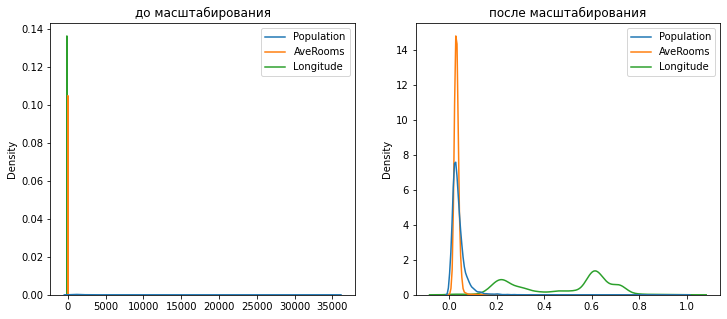

In [21]:
draw_kde(['Population', 'AveRooms', 'Longitude'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

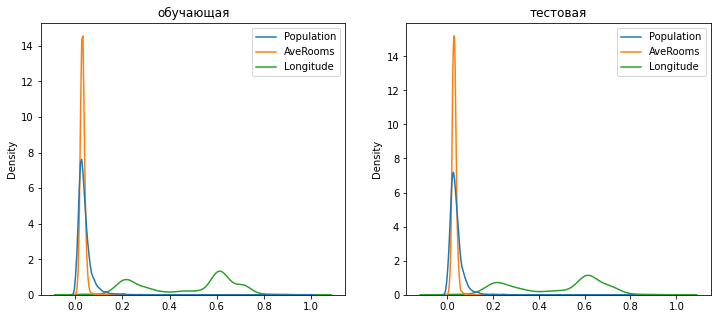

In [22]:
draw_kde(['Population', 'AveRooms', 'Longitude'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

# Задача2.Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод на основе корреляции признаков. 


In [25]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [26]:
make_corr_df(data)

,f1,f2,corr
0,Longitude,Latitude,0.924664
1,Latitude,Longitude,0.924664
2,AveRooms,AveBedrms,0.847621
3,AveBedrms,AveRooms,0.847621


In [27]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [28]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['Latitude', 'Longitude'], ['AveBedrms', 'AveRooms']]

<Axes: >

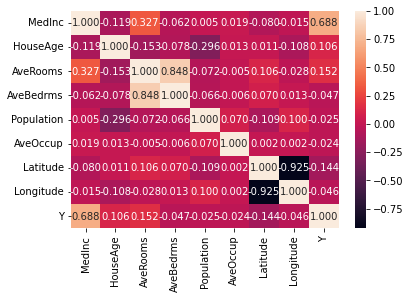

In [29]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

# Дополнительная задача

<ipython-input-32-46ea8e7e1a1b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MedInc'])


<Axes: xlabel='MedInc', ylabel='Density'>

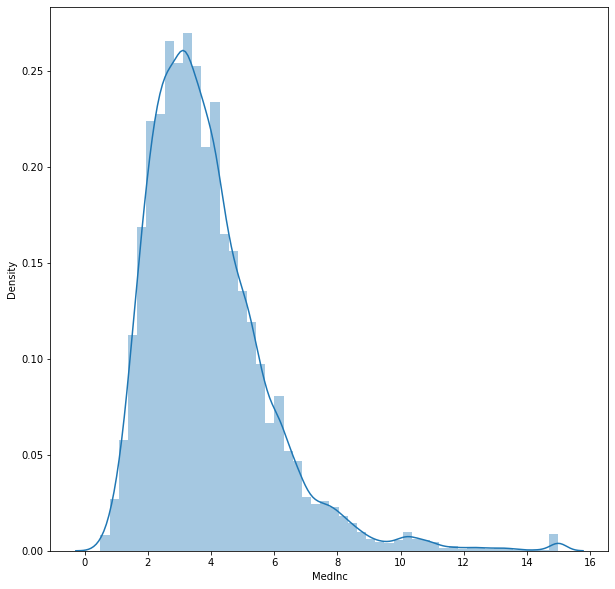

In [32]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['MedInc'])